Data Loading

In [67]:
# imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# fetch dataset (see https://github.com/uci-ml-repo/ucimlrepo for library details)
dataset = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 

# variable information 
# print(dataset.variables) 

df = dataset.data.original
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Cleaning (if needed)

In [69]:
# Check for null values in each column
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [70]:
# keys

marital_status = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

application_mode = {
    1: '1st Phase General Contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_attendance = {
    1: 'Daytime',
    0: 'Evening'
}

previous_qualification = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
   40: 'Higher education - degree (1st cycle)',
   42: 'Professional higher technical course',
   43: 'Higher education - master (2nd cycle)'
}

nationality = {
    1: 'Portugese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

mothers_qualification = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schoolin',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycl',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

fathers_qualification = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

mothers_occupation = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'personal service workers',
    152: 'sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

fathers_occupation = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'fathers_qualification',
    123: 'teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'personal service workers',
    152: 'sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

displaced = {
    1: 'Yes',
    0: 'No'
}

educational_special_needs = {
    1: 'Yes',
    0: 'No'
}

debtor = {
    1: 'Yes',
    0: 'No'
}

tuition_fees_up_to_date = {
    1: 'Yes',
    0: 'No'
}

gender = {
    1: 'Male',
    0: 'Female'
}

scholarship_holder = {
    1: 'Yes',
    0: 'No'
}

international = {
    1: 'Yes',
    0: 'No'
}

In [71]:
# map columns to keys
data = df.copy()
data['Marital Status'] = data['Marital Status'].map(marital_status)
data['Application mode'] = data['Application mode'].map(application_mode)
data['Course'] = data['Course'].map(course)
data['Daytime/evening attendance'] = data['Daytime/evening attendance'].map(daytime_evening_attendance)
data['Previous qualification'] = data['Previous qualification'].map(previous_qualification)
data['Nacionality'] = data['Nacionality'].map(nationality)
data["Mother's qualification"] = data["Mother's qualification"].map(mothers_qualification)
data["Father's qualification"] = data["Father's qualification"].map(fathers_qualification)
data["Mother's occupation"] = data["Mother's occupation"].map(mothers_occupation)
data["Father's occupation"] = data["Father's occupation"].map(fathers_occupation)
data['Displaced'] = data['Displaced'].map(displaced)
data['Educational special needs'] = data['Educational special needs'].map(educational_special_needs)
data['Debtor'] = data['Debtor'].map(debtor)
data['Tuition fees up to date'] = data['Tuition fees up to date'].map(tuition_fees_up_to_date)
data['Scholarship holder'] = data['Scholarship holder'].map(scholarship_holder)

In [72]:
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portugese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portugese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase General Contingent,5,Communication Design,Daytime,Secondary education,122.0,Portugese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portugese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portugese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase General Contingent,6,Journalism and Communication,Daytime,Secondary education,125.0,Portugese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase General Contingent,2,Journalism and Communication,Daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase General Contingent,1,Nursing,Daytime,Secondary education,154.0,Portugese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase General Contingent,1,Management,Daytime,Secondary education,180.0,Portugese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Exploring
- Summarize key variables, data volume, missingness, and potential target or interaction signals.
- Include at least three informative visualizations (distribution, correlation, grouping, or trend).
- Identify initial ideas for features and any anticipated challenges (imbalance, sparsity, etc.).

In [73]:
# marital status
table = pd.crosstab(data['Marital Status'], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Marital Status,,,
Divorced,42,16,33
Facto Union,11,3,11
Legally Separated,4,1,1
Married,179,52,148
Single,1184,720,2015
Widower,1,2,1


In [74]:
# application mode
table = pd.crosstab(data['Application mode'], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Application mode,,,
1st Phase General Contingent,345,300,1063
1st phase - special contingent (Azores Island),2,8,6
1st phase - special contingent (Madeira Island),5,8,25
2nd phase - general contingent,256,159,457
3rd phase - general contingent,45,16,63
Change of course,115,75,122
Change of institution/course,20,13,26
Change of institution/course (International),0,0,1
Holders of other higher courses,85,7,47


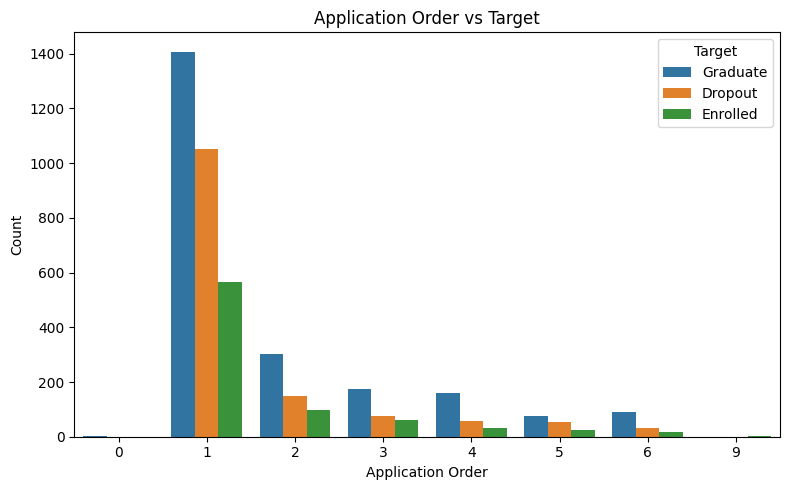

In [75]:
# application order
app_order_col = 'Application order'
target_col = 'Target'

plt.figure(figsize=(8,5))
sns.countplot(data=data, x=app_order_col, hue=target_col)
plt.title('Application Order vs Target')
plt.xlabel('Application Order')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [76]:
# course
table = pd.crosstab(data['Course'], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Course,,,
Advertising and Marketing Management,95,48,125
Agronomy,86,37,87
Animation and Multimedia Design,82,37,96
Basic Education,85,50,57
Biofuel Production Technologies,8,3,1
Communication Design,51,42,133
Equinculture,78,21,42
Informatics Engineering,92,64,14
Journalism and Communication,101,34,196


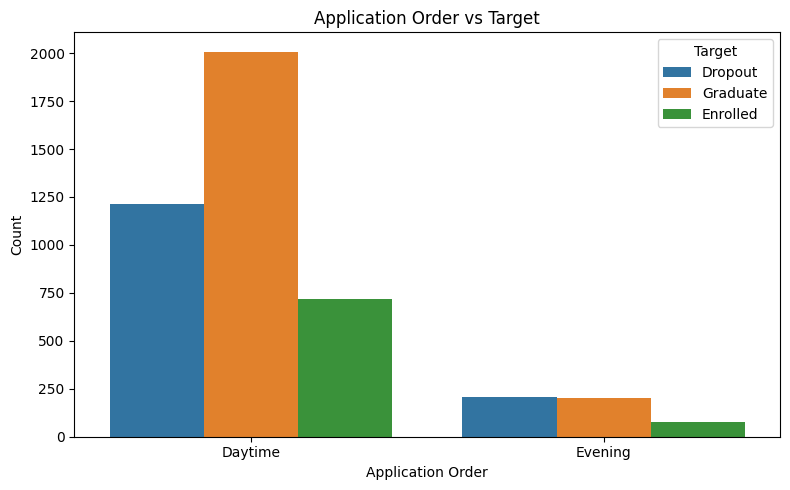

In [77]:
# daytime/evening attendance

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Daytime/evening attendance', hue='Target')
plt.title('Application Order vs Target')
plt.xlabel('Application Order')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [78]:
# previous qualification
table = pd.crosstab(data['Previous qualification'], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Previous qualification,,,
10th year of schooling,1,0,0
10th year of schooling - not completed,1,0,1
11th year of schooling - not completed,3,0,1
12th year of schooling - not completed,11,0,0
Basic education 2nd cycle (6th/7th/8th year) or equiv.,3,1,3
Basic education 3rd cycle (9th/10th/11th year) or equiv.,104,13,45
Frequency of higher education,7,1,8
Higher education - bachelor's degree,16,1,6
Higher education - degree,75,4,47


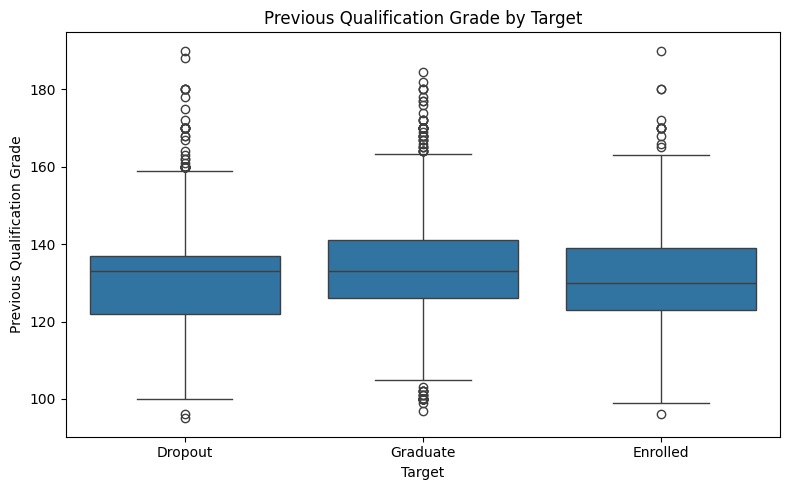

In [79]:
# Previous Qualification Grade
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Target', y='Previous qualification (grade)')
plt.title('Previous Qualification Grade by Target')
plt.xlabel('Target')
plt.ylabel('Previous Qualification Grade')
plt.tight_layout()
plt.show()

In [80]:
# nationality
nationality_table = pd.crosstab(data['Nacionality'], data['Target'])
display(nationality_table)

Target,Dropout,Enrolled,Graduate
Nacionality,,,
Angolan,1,1,0
Brazilian,14,6,18
Cape Verdean,4,1,8
Colombian,1,0,0
Cuban,0,1,0
Dutch,0,0,1
English,0,0,1
German,0,0,2
Guinean,1,0,4


In [81]:
# mother's qualification
table = pd.crosstab(data["Mother's qualification"], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Mother's qualification,,,
10th Year of Schooling,1,0,1
11th Year of Schooling - Not Completed,2,0,1
12th Year of Schooling - Not Completed,5,0,3
2nd cycle of the general high school course,1,0,0
7th Year (Old),2,0,1
7th year of schooling,0,0,1
8th year of schooling,1,0,2
9th Year of Schooling - Not Completed,1,0,2
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,140,91,331


In [82]:
# father's qualification
table = pd.crosstab(data["Father's qualification"], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Father's qualification,,,
10th Year of Schooling,1,0,3
11th Year of Schooling - Not Completed,2,0,0
12th Year of Schooling - Not Completed,1,0,4
2nd cycle of the general high school course,1,0,0
2nd year complementary high school course,1,0,0
7th Year (Old),4,0,6
7th year of schooling,1,0,1
8th year of schooling,1,1,2
9th Year of Schooling - Not Completed,3,0,0


In [83]:
# Mother's Occupation
table = pd.crosstab(data["Mother's occupation"], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Mother's occupation,,,
(blank),13,2,2
Administrative staff,248,147,422
Armed Forces Professions,1,2,1
"Data, accounting, statistical, financial services and registry-related operators",0,2,1
"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",26,14,51
Health professionals,0,2,0
Installation and Machine Operators and Assembly Workers,15,7,14
Intermediate Level Technicians and Professions,95,79,177
Intermediate level science and engineering technicians and professions,0,1,0


In [84]:
# Father's Occupation 
table = pd.crosstab(data["Father's occupation"], data['Target'])
display(table)

Target,Dropout,Enrolled,Graduate
Father's occupation,,,
(blank),13,2,4
Administrative staff,139,74,173
Armed Forces Officers,0,0,1
Armed Forces Professions,85,54,127
Armed Forces Sergeants,0,1,1
"Data, accounting, statistical, financial services and registry-related operators",0,0,1
Directors of administrative and commercial services,1,1,0
"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",69,48,125
"Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",0,3,2


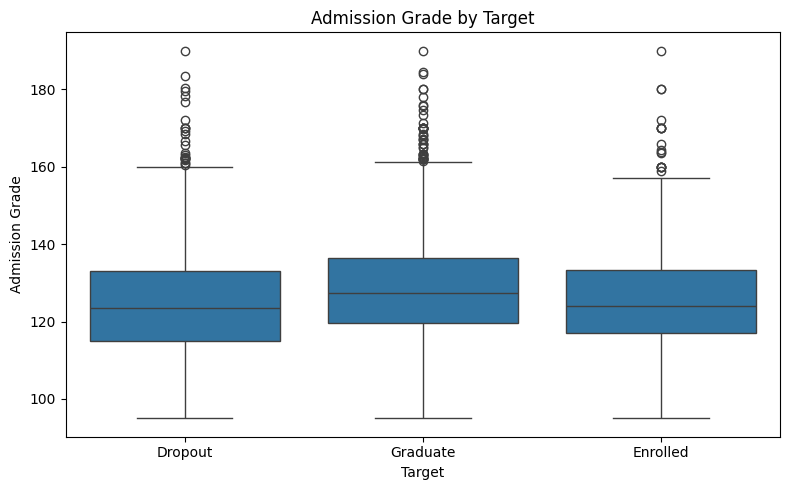

In [85]:
# admission grade
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Target', y='Admission grade')
plt.title('Admission Grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.tight_layout()
plt.show()

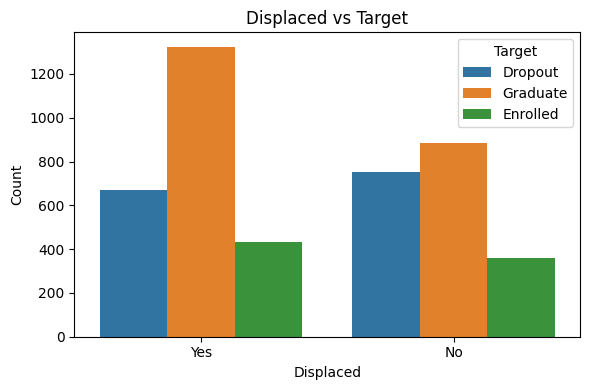

In [86]:
# Displaced
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Displaced', hue='Target', order=data['Displaced'].value_counts().index)
plt.title('Displaced vs Target')
plt.xlabel('Displaced')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

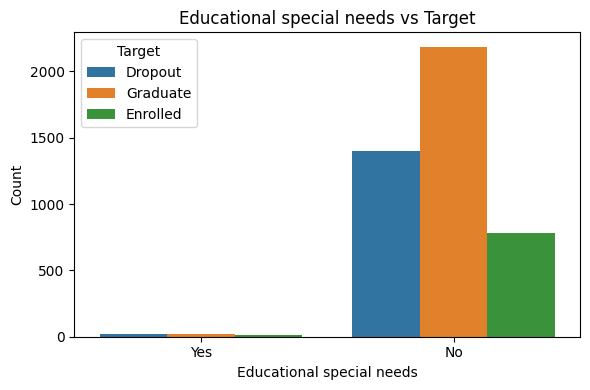

In [87]:
# educational special needs
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Educational special needs', hue='Target', order=data['Displaced'].value_counts().index)
plt.title('Educational special needs vs Target')
plt.xlabel('Educational special needs')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

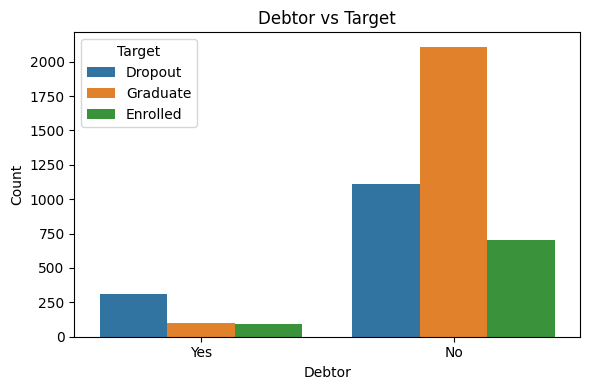

In [88]:
# debtor
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Debtor', hue='Target', order=data['Displaced'].value_counts().index)
plt.title('Debtor vs Target')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

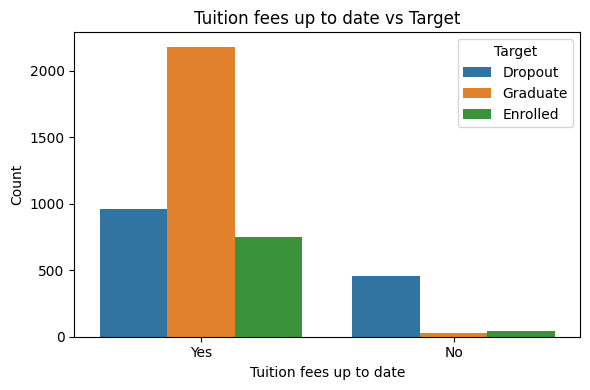

In [89]:
# tuition fees up to date
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Tuition fees up to date', hue='Target')
plt.title('Tuition fees up to date vs Target')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

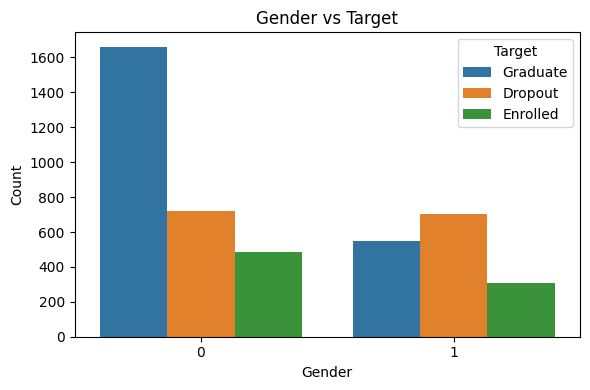

In [90]:
# Gender
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender', hue='Target', order=data['Gender'].value_counts().index)
plt.title('Gender vs Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

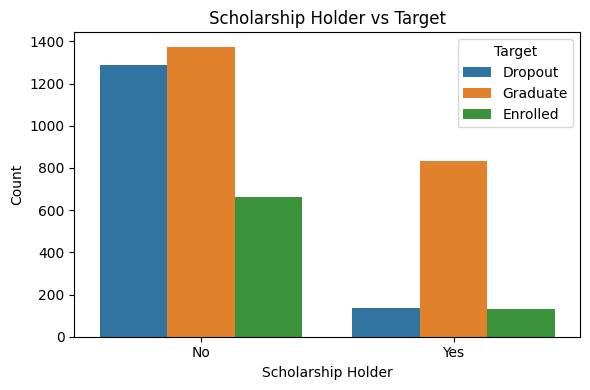

In [91]:
# Scholarship Holder
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Scholarship holder', hue='Target', order=data['Scholarship holder'].value_counts().index)
plt.title('Scholarship Holder vs Target')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

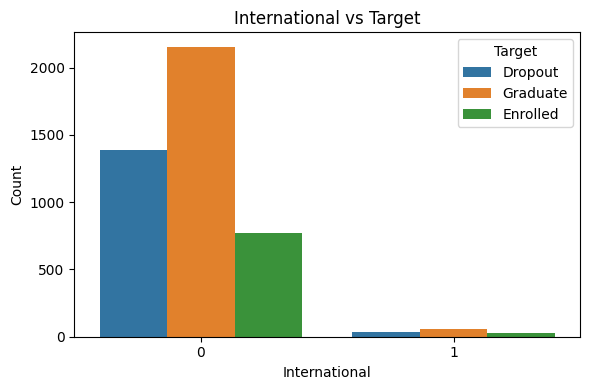

In [92]:
# international
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='International', hue='Target')
plt.title('International vs Target')
plt.xlabel('International')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

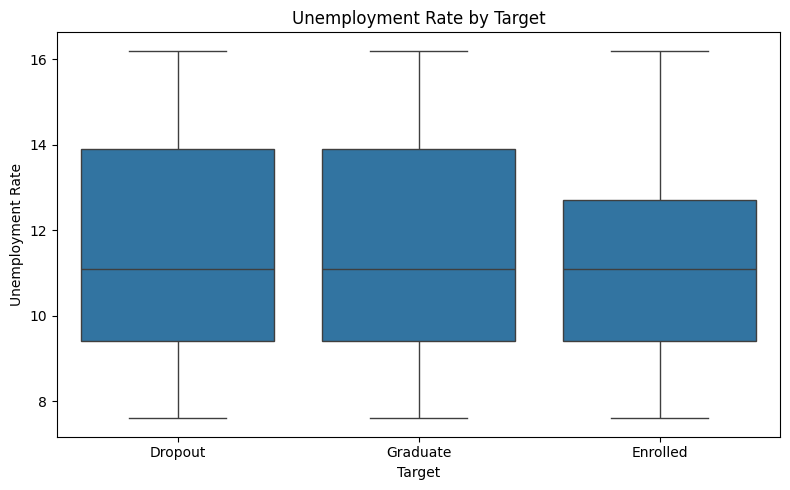

In [93]:
# Unemployment Rate vs Target
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Target', y='Unemployment rate')
plt.title('Unemployment Rate by Target')
plt.xlabel('Target')
plt.ylabel('Unemployment Rate')
plt.tight_layout()
plt.show()

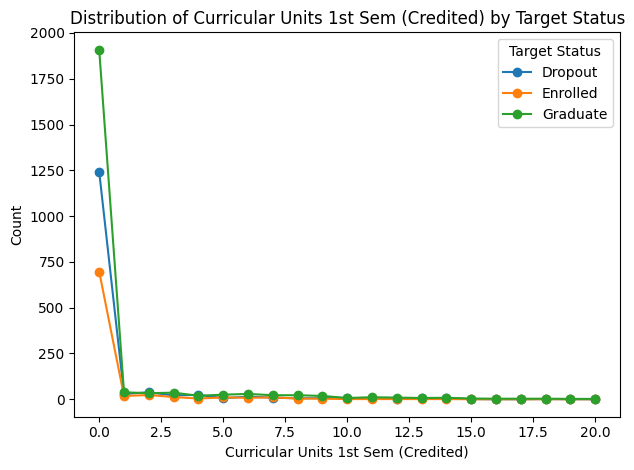

count    4424.000000
mean        0.709991
std         2.360507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: Curricular units 1st sem (credited), dtype: float64

In [94]:
# Line plot: x=units, y=count, lines=target status
unit_col = 'Curricular units 1st sem (credited)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (Credited)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (Credited) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (credited)'].describe()

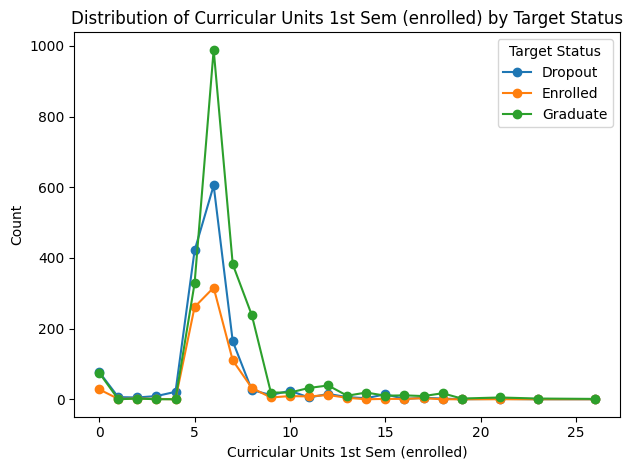

count    4424.000000
mean        6.270570
std         2.480178
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        26.000000
Name: Curricular units 1st sem (enrolled), dtype: float64

In [95]:
unit_col = 'Curricular units 1st sem (enrolled)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (enrolled)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (enrolled) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (enrolled)'].describe()

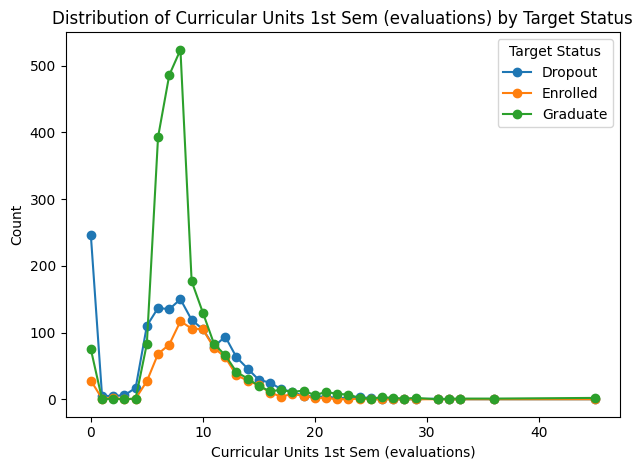

count    4424.000000
mean        8.299051
std         4.179106
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        45.000000
Name: Curricular units 1st sem (evaluations), dtype: float64

In [96]:
unit_col = 'Curricular units 1st sem (evaluations)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (evaluations)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (evaluations) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (evaluations)'].describe()

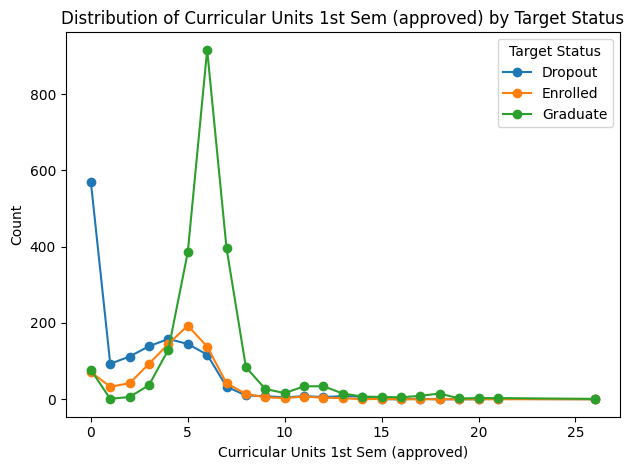

count    4424.000000
mean        4.706600
std         3.094238
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        26.000000
Name: Curricular units 1st sem (approved), dtype: float64

In [97]:
unit_col = 'Curricular units 1st sem (approved)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (approved)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (approved) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (approved)'].describe()

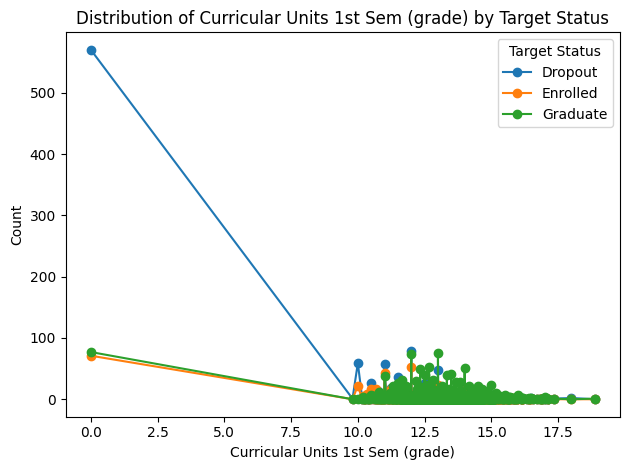

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

In [98]:
unit_col = 'Curricular units 1st sem (grade)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (grade)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (grade) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (grade)'].describe()

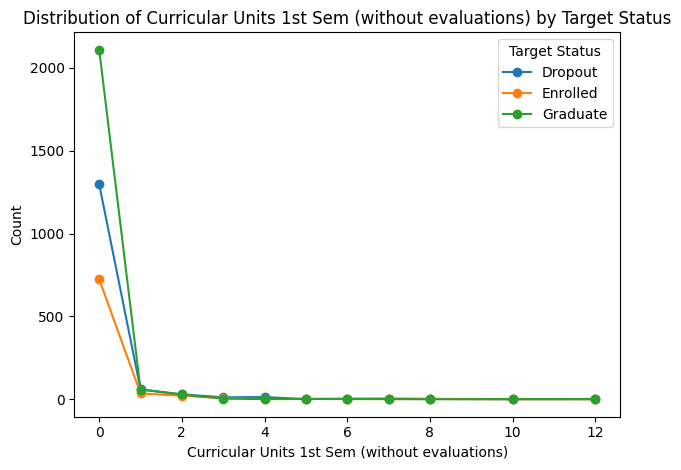

count    4424.000000
mean        0.137658
std         0.690880
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular units 1st sem (without evaluations), dtype: float64

In [99]:
unit_col = 'Curricular units 1st sem (without evaluations)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 1st Sem (without evaluations)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 1st Sem (without evaluations) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 1st sem (without evaluations)'].describe()

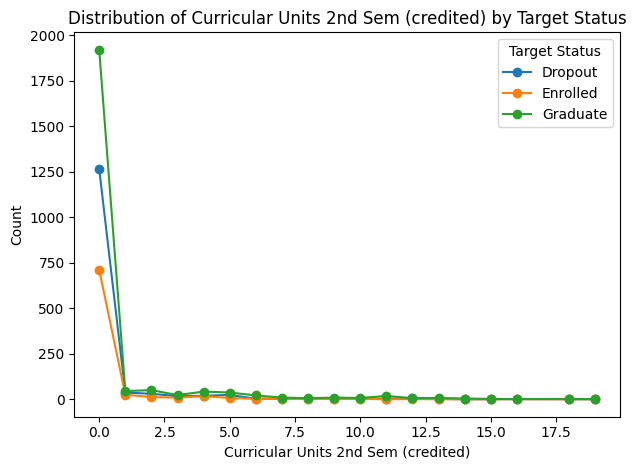

count    4424.000000
mean        0.541817
std         1.918546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Curricular units 2nd sem (credited), dtype: float64

In [100]:
unit_col = 'Curricular units 2nd sem (credited)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (credited)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (credited) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (credited)'].describe()

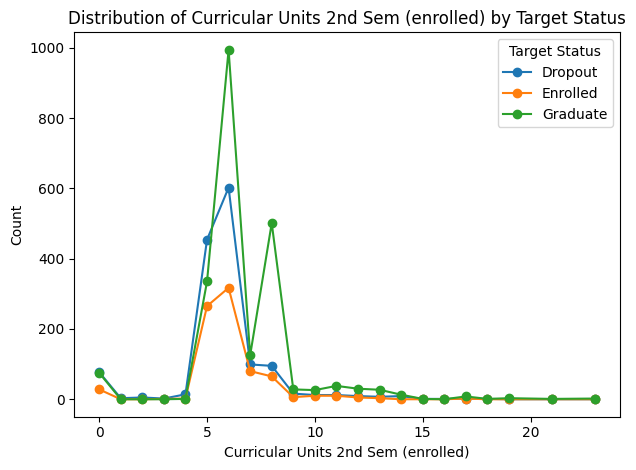

count    4424.000000
mean        6.232143
std         2.195951
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        23.000000
Name: Curricular units 2nd sem (enrolled), dtype: float64

In [101]:
unit_col = 'Curricular units 2nd sem (enrolled)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (enrolled)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (enrolled) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (enrolled)'].describe()

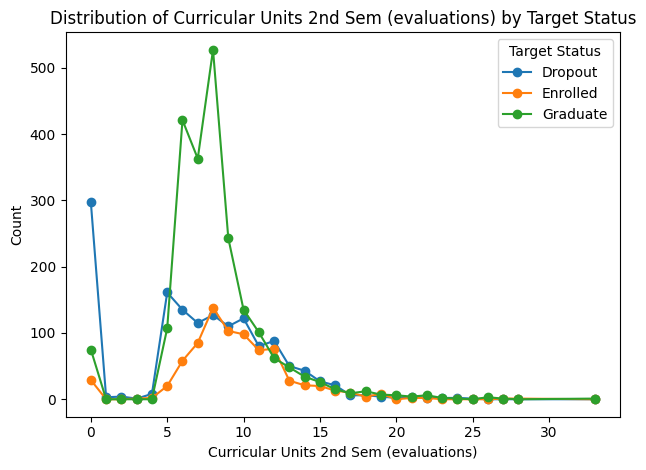

count    4424.000000
mean        8.063291
std         3.947951
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        33.000000
Name: Curricular units 2nd sem (evaluations), dtype: float64

In [102]:
unit_col = 'Curricular units 2nd sem (evaluations)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (evaluations)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (evaluations) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (evaluations)'].describe()

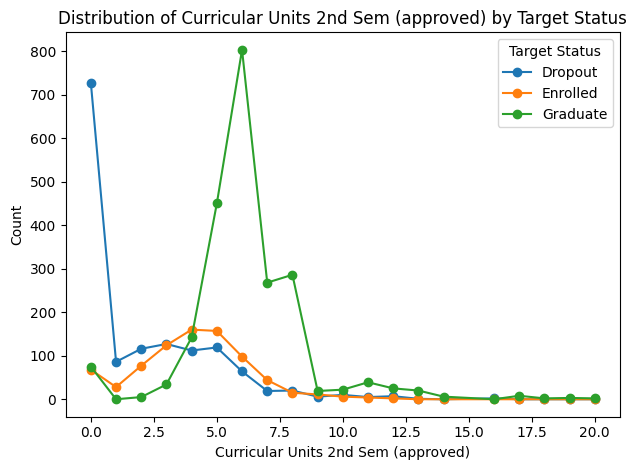

count    4424.000000
mean        4.435805
std         3.014764
min         0.000000
25%         2.000000
50%         5.000000
75%         6.000000
max        20.000000
Name: Curricular units 2nd sem (approved), dtype: float64

In [103]:
unit_col = 'Curricular units 2nd sem (approved)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (approved)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (approved) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (approved)'].describe()

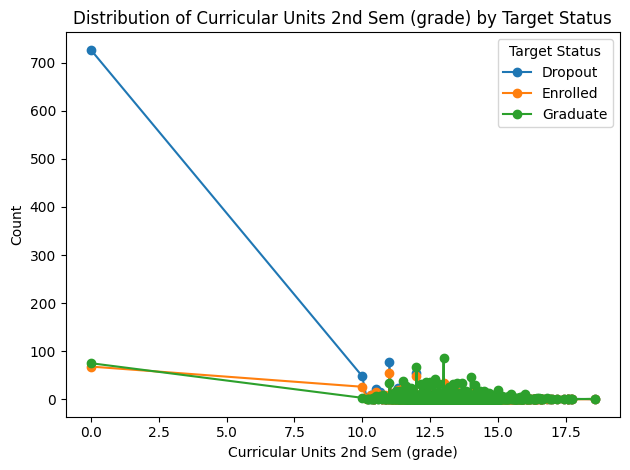

count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: Curricular units 2nd sem (grade), dtype: float64

In [104]:
unit_col = 'Curricular units 2nd sem (grade)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (grade)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (grade) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (grade)'].describe()

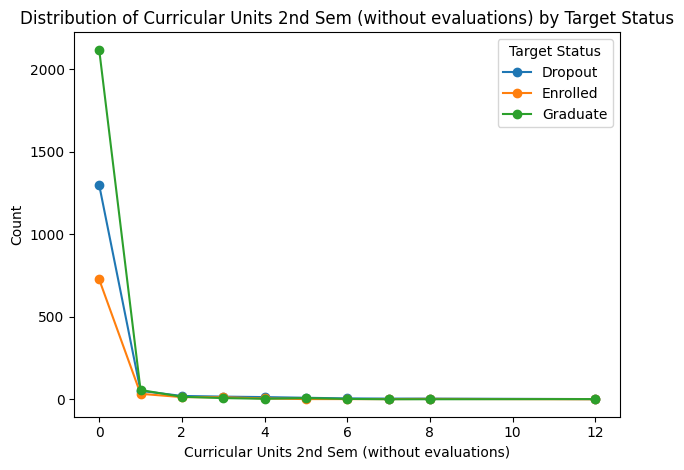

count    4424.000000
mean        0.150316
std         0.753774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular units 2nd sem (without evaluations), dtype: float64

In [105]:
unit_col = 'Curricular units 2nd sem (without evaluations)'
target_col = 'Target'
counts = data.groupby([unit_col, target_col]).size().unstack(fill_value=0)
for status in counts.columns:
    plt.plot(counts.index, counts[status], marker='o', label=status)
plt.xlabel('Curricular Units 2nd Sem (without evaluations)')
plt.ylabel('Count')
plt.title('Distribution of Curricular Units 2nd Sem (without evaluations) by Target Status')
plt.legend(title='Target Status')
plt.tight_layout()
plt.show()
data['Curricular units 2nd sem (without evaluations)'].describe()

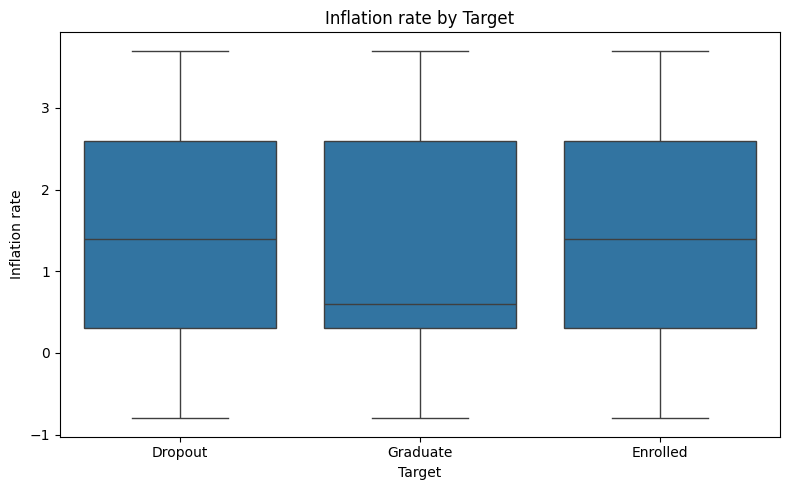

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Target', y='Inflation rate')
plt.title('Inflation rate by Target')
plt.xlabel('Target')
plt.ylabel('Inflation rate')
plt.tight_layout()
plt.show()

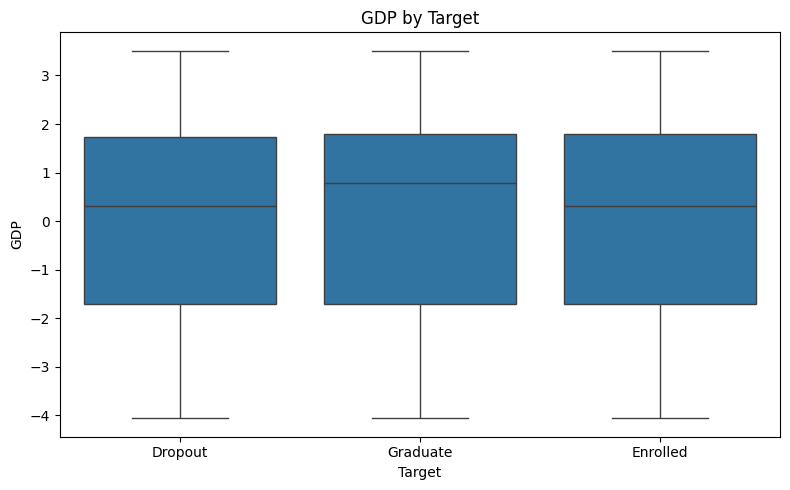

In [107]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Target', y='GDP')
plt.title('GDP by Target')
plt.xlabel('Target')
plt.ylabel('GDP')
plt.tight_layout()
plt.show()

In [109]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64